## MapReduce

MapReduce es un modelo de programación que nos permite procesar enormes cantidades de datos de forma distribuida sobre un cluster.

La idea principal detrás de este modelo de programación consiste en primero transformar los datos de tal forma que tengan un formato (llave, valor) para después reducir los datos, combinando de alguna manera todos los valores correspondientes a la misma llave.

Para realizar este proceso solo es necesario definir dos funciones:

    Map: Transforma los datos en pares (llave, valor).
    Reduce: Combina todos los valores asociados a la misma llave de alguna forma.

El gran atractivo que tiene este modelo de programación es que permite a herramientas como Spark procesar grandes cantidades de datos sobre un cluster si no que incluso puede evitar que fallas en los nodos del cluster afecten los cálculos y procesos realizados con los datos.

En este notebook nos daremos a la tarea de mostrar varios ejemplos de como llevar a cabo este modelo de programación usando Python y PySpark.

Antes de pasar a los ejemplos debemos instalar nuestro entorno de desarrollo con PySpark.

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
# !apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [1]:
import pyspark
# Carga ufnciones extra
from pyspark.sql.functions import * 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('MapReduce').getOrCreate()

25/02/22 08:43:14 WARN Utils: Your hostname, vania-Latitude-7400 resolves to a loopback address: 127.0.1.1; using 10.153.221.214 instead (on interface wlo1)
25/02/22 08:43:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/22 08:43:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Procesamiento del lenguaje natural
!pip install nltk
!pip install --upgrade pip
!python -m nltk.downloader all

import nltk
import string

# Experimental?

#!pip install sentiment-analysis-spanish
#!pip install keras tensorflow

from sentiment_analysis_spanish import sentiment_analysis


[notice] A new release of pip is available: 23.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:000m eta 0:00:01:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.1
    Uninstalling pip-23.1.1:
      Successfully uninstalled pip-23.1.1
/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/vania/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]   

[nltk_data]    |   Package lin_thesaurus is already up-to-date!
[nltk_data]    | Downloading package mac_morpho to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package mac_morpho is already up-to-date!
[nltk_data]    | Downloading package machado to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package machado is already up-to-date!
[nltk_data]    | Downloading package masc_tagged to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package masc_tagged is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker_tab to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_da

[nltk_data]    |   Unzipping help/tagsets_json.zip.
[nltk_data]    | Downloading package timit to /home/vania/nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /home/vania/nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to /home/vania/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to /home/vania/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /home/vania/nltk_d

En esta sección revisaremos con ejemplos muy sencillos algunas de las combinaciones de funciones Map y Reduce más comunes. Estos ejemplos usan datos muy sencillos.

### Reduce

La operación Reduce asume que todos los valores corresponden a la misma llave, es decir se toma la función Map como la función identidad.

Creemos un RDD a partir cuyos elementos sean 500 números enteros, estos los crearemos de forma aleatoria usando numpy

In [4]:
np.random.seed(182)
dat_numeros = np.random.randint(10, size=500)

Veamos una muestra

In [5]:
dat_numeros[:10]

array([9, 8, 2, 2, 2, 5, 8, 8, 7, 2])

Creamos el RDD y revisamos su contenido

In [6]:
rdd_numeros = spark.sparkContext.parallelize(dat_numeros)

In [7]:
for elemento in rdd_numeros.take(5):
    print(elemento)

9
8
2
2
2


Podemos usar reduce para sumar todos los elementos

In [8]:
suma = rdd_numeros.reduce(lambda a, b: a + b)
suma

2141

O encontrar el número más grande

In [9]:
maximo = rdd_numeros.reduce(lambda a, b: a if a > b else b)
maximo

9

### Map

Supongamos ahora que queremos saber la distribución de números en los datos, para esto tendremos que contar cuantas veces aparece cada numero, para esto podemos mapear los elemento de tal forma que cada elemento numero al par cuya llave sea el numero y el valor el numero de apariciones de dicho numero en cada renglón, es decir (numero, 1). Esto lo podemos lograr con la función map de la siguiente forma

In [10]:
rdd_conteo = rdd_numeros.map(lambda x: (x, 1))

for elemento in rdd_conteo.take(5):
    print(elemento)

(9, 1)
(8, 1)
(2, 1)
(2, 1)
(2, 1)


La función map también la podemos usar para transformar a los elementos del RDD de la forma en que queramos. Por ejemplo, podríamos querer obtener las 3 primeras potencias de cada elemento

In [11]:
# Podemos pasar una funcion 
def potencias(x):
    return (x**1, x**2, x**3)

# Aplicamos la funcion
rdd_potencias = rdd_numeros.map(potencias)

# Imprimimos 
for elemento in rdd_potencias.take(5):
    print(elemento)

(9, 81, 729)
(8, 64, 512)
(2, 4, 8)
(2, 4, 8)
(2, 4, 8)


### reduceByKey

Habiendo transformado nuestros datos en pares (llave, etiqueta) podemos aplicar una función de Reduce, para saber cuantas veces aparece cada numero solo debemos sumar los valores para cada llave. Esto lo logramos de la siguiente manera

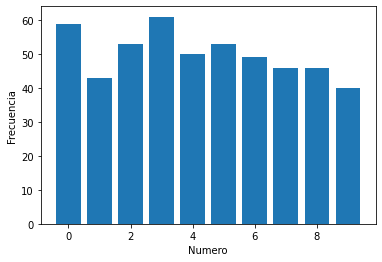

In [12]:
# Calculamos la suma para cada llave
rdd_histograma = rdd_conteo.reduceByKey(lambda a, b: a + b)

# Imprimimos el histograma

histograma = rdd_histograma.collect()

numeros = [ numero for (numero, _) in histograma ]
frecuencias = [ frecuencia for (_, frecuencia) in histograma ]
plt.bar(numeros, frecuencias)
plt.xlabel('Numero')
plt.ylabel('Frecuencia')
plt.show()

Supongamos ahora que tenemos un texto separado por renglones de la siguiente manera

In [13]:
texto = ['este es el primer parrafo del texto', 
         'este es el segundo parrafo del texto', 
         'agreguemos otro parrafo']

Carguamos este texto a un RDD

In [14]:
rdd_texto = spark.sparkContext.parallelize(texto)

for parrafo in rdd_texto.collect():
    print(parrafo)

este es el primer parrafo del texto
este es el segundo parrafo del texto
agreguemos otro parrafo


Pensemos que queremos contar cuantas veces aparece cada palabra en todo el texto. Una forma de hacerlo es creando pares (palabra, 1) (parecido al ejemplo pasado), sin embargo los elementos del RDD deberían ser las palabras no los párrafos.

In [15]:
rdd_conteo_texto = rdd_texto.map(lambda x: (x, 1))

for elemento in rdd_conteo_texto.take(5):
    print(elemento)

('este es el primer parrafo del texto', 1)
('este es el segundo parrafo del texto', 1)
('agreguemos otro parrafo', 1)


Para esto existe la función flatMap, nos ayuda a aplanar los elementos del RDD. Veamos como funciona

In [16]:
rdd_palabras = rdd_texto.flatMap(lambda parrafo: parrafo.split(' '))

for palabra in rdd_palabras.take(10):
    print(palabra)

este
es
el
primer
parrafo
del
texto
este
es
el


Para el conteo de palabras...

In [17]:
histograma_palabras = rdd_palabras.map(lambda palabra: (palabra, 1)) \
                                  .reduceByKey(lambda a, b: a + b) \
                                  .sortBy(lambda x: x[1], ascending = False) \
                                  .collect()


print ("{:<10} {:<10}".format('PALABRA', 'FRECUENCIA'))

for palabra, frecuencia in histograma_palabras:
    print ("{:<10} {:<10}".format(palabra, frecuencia))

PALABRA    FRECUENCIA
parrafo    3         
este       2         
el         2         
es         2         
del        2         
texto      2         
segundo    1         
primer     1         
agreguemos 1         
otro       1         


Si quisiéramos separar las tareas map y reduce

In [18]:
# Map
rdd_par_palabras = rdd_texto.flatMap(lambda parrafo: parrafo.split(' ')) \
                            .map(lambda palabra: (palabra, 1))

print('Resultado del Map')
for par in rdd_par_palabras.take(5):
    print(par)

# Reduce
rdd_histograma_palabras = rdd_par_palabras.reduceByKey(lambda a, b: a + b) \
                                      .sortBy(lambda x: x[1], ascending = False)

print('\nResultado del Reduce')
for par in rdd_histograma_palabras.take(5):
    print(par)                                

Resultado del Map
('este', 1)
('es', 1)
('el', 1)
('primer', 1)
('parrafo', 1)

Resultado del Reduce
('parrafo', 3)
('este', 2)
('el', 2)
('es', 2)
('del', 2)


### mapValues

Otra función que puede resultar útil al momento de crear funciones Map es la de mapValues. Imaginemos que ahora tenemos tres textos diferentes

In [19]:
texto_1 = ['esto es un parrafo', 'otro_parrafo']
texto_2 = ['este texto solo tiene un parrafo']
texto_3 = ['parrafo 1', 'parrafo 2', 'parrafo 3']

textos = [('texto_1', texto_1), ('texto_2', texto_2), ('texto_3', texto_3)]

Creamos un RDD con los textos

In [20]:
rdd_textos = spark.sparkContext.parallelize(textos)

for texto in rdd_textos.take(1):
    print(texto)

('texto_1', ['esto es un parrafo', 'otro_parrafo'])


Este RDD ya está formateado en pares (texto_id, texto). 

Si quisiéramos saber cuantos párrafos tiene cada texto deberíamos encontrar una forma de calcular len(texto) para cada par sin alterar la llave. Podemos hacer esto usando la función mapValues, que dado un par (llave, valor) aplica una transformación solo al valor

In [21]:
rdd_num_parrafos = rdd_textos.mapValues(lambda valor: len(valor))

print ("{:<10} {:<10}".format('TEXTO', 'NUM_PARRAFOS'))

for texto, num_parrafos in rdd_num_parrafos.collect():
    print ("{:<10} {:<10}".format(texto, num_parrafos))

TEXTO      NUM_PARRAFOS
texto_1    2         
texto_2    1         
texto_3    3         


### Caso de Uso

En nuestro caso de uso emplearemos una base de datos que contiene las letras del top 10 de canciones en México según spotify (esto es para el día 4 de marzo de 2021). Por simplicidad se han omitido las canciones que estén en ingles.

La base de datos cuenta con los siguientes campos canción, artista y letra separados por el caracter '*'. 

In [22]:
rdd_letras = spark.sparkContext.textFile('../data/top_10_mexico.csv').map(lambda x: x.split('*'))

for cancion in rdd_letras.take(1):
    print(cancion)

['Bad Bunny, Jhay Cortez', 'DÁKITI', "Baby, ya yo me enteré, se nota cuando me ve' Ahí donde no has llegao' sabes que yo te llevaré Y dime qué quieres beber, es que tú eres mi bebé ¿Y de nosotros quién va a hablar? Si no nos dejamos ver Y a veces es Dolce, a veces Bulgari Cuando te lo quito después de los parties Las copas de vino, las libras de mari Tú estás bien suelta, yo de safari Tú mueve' el culo fenomenal Pa' yo devorarte como animal Si no te has vení'o, yo te vo' a esperar En mi cama y lo vo' a celebrar Baby, a ti no me opongo Y siempre te lo pongo Y si tú me tiras, vamo' a nadar en lo hondo Si es por mí te lo pongo De septiembre hasta agosto A mí sin cojone' lo que digan tus amigas Ya yo me enteré, se nota cuando me ve' Ahí donde no has llegao' sabes que yo te llevaré Y dime qué quieres beber, es que tú eres mi bebé ¿Y de nosotros quién va a hablar? Si no nos dejamos ver (¿me sigues?) Mami, me tienes juqueao', sí Si fueras la Uru, me tuvieses parqueao' Dando vueltas por Condad

### Limpieza de datos

Notemos que las letras de canciones, como el texto en general, deben ser preprocesados para poder analizados de una forma más eficiente. En nuestro caso nos enfocaremos en los siguientes puntos:

    Transformar todo el texto a minúsculas.
    Eliminar signos de puntuación.
    Eliminar las palabras vacías, que son palabras que aportan poco contexto al problema.

Empecemos transformando las letras a minúsculas

In [23]:
rdd_letras = rdd_letras.map(lambda x: (x[0], x[1], x[2].lower()))

for letra in rdd_letras.take(1):
    print(letra[2],'\n')

baby, ya yo me enteré, se nota cuando me ve' ahí donde no has llegao' sabes que yo te llevaré y dime qué quieres beber, es que tú eres mi bebé ¿y de nosotros quién va a hablar? si no nos dejamos ver y a veces es dolce, a veces bulgari cuando te lo quito después de los parties las copas de vino, las libras de mari tú estás bien suelta, yo de safari tú mueve' el culo fenomenal pa' yo devorarte como animal si no te has vení'o, yo te vo' a esperar en mi cama y lo vo' a celebrar baby, a ti no me opongo y siempre te lo pongo y si tú me tiras, vamo' a nadar en lo hondo si es por mí te lo pongo de septiembre hasta agosto a mí sin cojone' lo que digan tus amigas ya yo me enteré, se nota cuando me ve' ahí donde no has llegao' sabes que yo te llevaré y dime qué quieres beber, es que tú eres mi bebé ¿y de nosotros quién va a hablar? si no nos dejamos ver (¿me sigues?) mami, me tienes juqueao', sí si fueras la uru, me tuvieses parqueao' dando vueltas por condado, contigo siempre arrebatao' tú no er

Para poder tratar con el texto a nivel de palabras debemos hacer lo siguiente

In [24]:
rdd_letras = rdd_letras.map(lambda x: (x[0], x[1], x[2].split(' ')))

for letra in rdd_letras.take(1):
    l = letra[2]
    print(letra[2])

['baby,', 'ya', 'yo', 'me', 'enteré,', 'se', 'nota', 'cuando', 'me', "ve'", 'ahí', 'donde', 'no', 'has', "llegao'", 'sabes', 'que', 'yo', 'te', 'llevaré', 'y', 'dime', 'qué', 'quieres', 'beber,', 'es', 'que', 'tú', 'eres', 'mi', 'bebé', '¿y', 'de', 'nosotros', 'quién', 'va', 'a', 'hablar?', 'si', 'no', 'nos', 'dejamos', 'ver', 'y', 'a', 'veces', 'es', 'dolce,', 'a', 'veces', 'bulgari', 'cuando', 'te', 'lo', 'quito', 'después', 'de', 'los', 'parties', 'las', 'copas', 'de', 'vino,', 'las', 'libras', 'de', 'mari', 'tú', 'estás', 'bien', 'suelta,', 'yo', 'de', 'safari', 'tú', "mueve'", 'el', 'culo', 'fenomenal', "pa'", 'yo', 'devorarte', 'como', 'animal', 'si', 'no', 'te', 'has', "vení'o,", 'yo', 'te', "vo'", 'a', 'esperar', 'en', 'mi', 'cama', 'y', 'lo', "vo'", 'a', 'celebrar', 'baby,', 'a', 'ti', 'no', 'me', 'opongo', 'y', 'siempre', 'te', 'lo', 'pongo', 'y', 'si', 'tú', 'me', 'tiras,', "vamo'", 'a', 'nadar', 'en', 'lo', 'hondo', 'si', 'es', 'por', 'mí', 'te', 'lo', 'pongo', 'de', 'septi

Eliminamos los signos de puntuación

In [25]:
# Agregamos los simbolos usado en espanol
signos_puntuacion = list(string.punctuation) + ['¡', '¿']

def elimina_puntuacion(letra):
    letra_limpia = [''.join(caracter for caracter in palabra if caracter not in signos_puntuacion) for palabra in letra] 
    return letra_limpia

rdd_letras = rdd_letras.map(lambda x: (x[0], x[1], elimina_puntuacion(x[2])))

for letra in rdd_letras.take(1):
    print(letra[2], '\n')

['baby', 'ya', 'yo', 'me', 'enteré', 'se', 'nota', 'cuando', 'me', 've', 'ahí', 'donde', 'no', 'has', 'llegao', 'sabes', 'que', 'yo', 'te', 'llevaré', 'y', 'dime', 'qué', 'quieres', 'beber', 'es', 'que', 'tú', 'eres', 'mi', 'bebé', 'y', 'de', 'nosotros', 'quién', 'va', 'a', 'hablar', 'si', 'no', 'nos', 'dejamos', 'ver', 'y', 'a', 'veces', 'es', 'dolce', 'a', 'veces', 'bulgari', 'cuando', 'te', 'lo', 'quito', 'después', 'de', 'los', 'parties', 'las', 'copas', 'de', 'vino', 'las', 'libras', 'de', 'mari', 'tú', 'estás', 'bien', 'suelta', 'yo', 'de', 'safari', 'tú', 'mueve', 'el', 'culo', 'fenomenal', 'pa', 'yo', 'devorarte', 'como', 'animal', 'si', 'no', 'te', 'has', 'venío', 'yo', 'te', 'vo', 'a', 'esperar', 'en', 'mi', 'cama', 'y', 'lo', 'vo', 'a', 'celebrar', 'baby', 'a', 'ti', 'no', 'me', 'opongo', 'y', 'siempre', 'te', 'lo', 'pongo', 'y', 'si', 'tú', 'me', 'tiras', 'vamo', 'a', 'nadar', 'en', 'lo', 'hondo', 'si', 'es', 'por', 'mí', 'te', 'lo', 'pongo', 'de', 'septiembre', 'hasta', 'a

Eliminamos las palabras vacías

In [26]:
palabras_vacias = nltk.corpus.stopwords.words('spanish') + ['']

def quita_palabras_vacias(letra):
    letra_limpia = [palabra for palabra in letra if palabra not in palabras_vacias]
    return letra_limpia

rdd_letras = rdd_letras.map(lambda x: (x[0], x[1], quita_palabras_vacias(x[2])))

for letra in rdd_letras.take(1):
    print(letra[2], '\n')

['baby', 'enteré', 'nota', 've', 'ahí', 'llegao', 'sabes', 'llevaré', 'dime', 'quieres', 'beber', 'bebé', 'quién', 'va', 'hablar', 'si', 'dejamos', 'ver', 'veces', 'dolce', 'veces', 'bulgari', 'quito', 'después', 'parties', 'copas', 'vino', 'libras', 'mari', 'bien', 'suelta', 'safari', 'mueve', 'culo', 'fenomenal', 'pa', 'devorarte', 'animal', 'si', 'venío', 'vo', 'esperar', 'cama', 'vo', 'celebrar', 'baby', 'opongo', 'siempre', 'pongo', 'si', 'tiras', 'vamo', 'nadar', 'hondo', 'si', 'pongo', 'septiembre', 'agosto', 'cojone', 'digan', 'amigas', 'enteré', 'nota', 've', 'ahí', 'llegao', 'sabes', 'llevaré', 'dime', 'quieres', 'beber', 'bebé', 'quién', 'va', 'hablar', 'si', 'dejamos', 'ver', 'sigues', 'mami', 'juqueao', 'si', 'uru', 'parqueao', 'dando', 'vueltas', 'condado', 'contigo', 'siempre', 'arrebatao', 'señora', 'toma', 'cinco', 'mil', 'gástalo', 'sephora', 'louis', 'vuitton', 'compra', 'pandora', 'piercing', 'hombres', 'perfora', 'eheheh', 'hace', 'tiempo', 'rompieron', 'cora', 'co

#### Palabras más usadas

Ya con los datos limpios podemos hacer algunos análisis. Veamos cuales son las palabras más empleadas en las letras de las canciones

In [27]:
rdd_palabras_histograma = rdd_letras.map(lambda x: [(palabra, 1) for palabra in x[2]]) \
                         .flatMap(lambda x: x) \
                         .reduceByKey(lambda a, b: a + b) \
                         .sortBy(lambda x: x[1], ascending = False)

print ("{:<10} {:<10}".format('PALABRA', 'FRECUENCIA'))                     

for palabra, frecuencia in rdd_palabras_histograma.take(30):
    print ("{:<10} {:<10}".format(palabra, frecuencia))

PALABRA    FRECUENCIA
baila      60        
si         52        
pa         46        
eh         46        
baby       33        
pumpum     20        
ahora      19        
ey         15        
solo       15        
prada      15        
gucci      15        
sigo       14        
conmigo    14        
yeah       14        
oh         13        
ver        12        
noche      12        
bien       11        
encima     11        
corazón    11        
vez        11        
tiempo     11        
na         11        
va         10        
wuh        10        
amor       10        
pégate     10        
ven        10        
así        10        
balenciaga 10        


### Análisis de sentimientos

Usaremos la biblioteca sentiment_analysis para realizar el análisis de sentimiento de las letras de canciones. En la documentación menciona que se calcula la probabilidad de que el texto sea clasificado como positivo. Aunque se menciona que existe un rango entre 0 y 1 para los cuales el texto se considera neutro, dado que no se especifica dichos umbrales, en este caso solo clasificaremos las palabras entre positivas y negativas.

/home/vania/jupyter/jupyterenv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/vania/jupyter/jupyterenv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


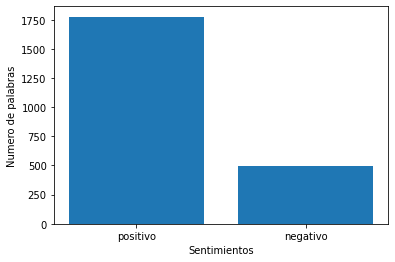

In [30]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

def sentimiento(palabra):

    prob = sentiment.sentiment(palabra)

    if prob >= 0.4:
        return 'positivo'
    else:
        return 'negativo'

histograma_sentimientos = rdd_letras.flatMap(lambda x: x[2]) \
                                    .map(lambda x: (sentimiento(x), 1)) \
                                    .reduceByKey(lambda a, b: a + b) \
                                    .collect()

sentimientos = [ sentimiento for (sentimiento, _) in histograma_sentimientos ]
frecuencias = [ frecuencia for (_, frecuencia) in histograma_sentimientos ]
plt.bar(sentimientos, frecuencias)
plt.xlabel('Sentimientos')
plt.ylabel('Numero de palabras')
plt.show()

### Práctica II (Individual)


Ejercicio

Encuentre en cuales canciones se encuentra cada palabra. Es decir, calcule un RDD cuyos elementos sean (palabra, (cancion_1, cancion_3)).

Hint: Investigue la función flatMapValues


Basado en los apuntes del Dr. Gibran Fuentes